# Amazon Product Data Analysis

## Dataset Overview
- Contains product listings from various categories with pricing, ratings, and review information
- Key columns: `product_id`, `product_name`, `category`, `discounted_price`, `actual_price`, `rating`, `review_content`
- Total records: [Add your dataset size here]

## Category Analysis

### 1. Main Category Distribution
[Main Categories](attachment:main_category_plot.png)
- **Visualization**: Horizontal bar chart showing product count per main category
- **Key Insights**:
  - Computers & Accessories dominates the dataset
  - Electronics/Home Theater is second largest category
  - Helps identify focus areas for inventory management

### 2. Sub-Category Distribution
[Sub Categories](attachment:sub_category_plot.png)
- **Visualization**: Horizontal bar chart showing product count per sub-category
- **Key Insights**:
  - Cables & Accessories is most populated sub-category
  - USBCables and WirelessUSBAdapters are prominent
  - Helps understand product type distribution

### 3. Category Hierarchy
[Hierarchical View](attachment:hierarchical_view.png)
- **Visualization**: Stacked bar chart showing main-sub category relationships
- **Key Insights**:
  - Computers&Accessories > Cables&Accessories has maximum products
  - Helps see category-subcategory relationships at glance

## Rating Analysis
[Ratings Distribution](attachment:ratings_distribution.png)
- **Visualization**: Histogram with KDE showing rating distribution
- **Key Insights**:
  - Most products have ratings between 4.0-4.5
  - Few products have ratings below 3.5
  - Helps identify quality trends

## Pricing Analysis
[Price Distribution](attachment:price_distribution.png)
- **Visualization**: Box plots showing price distribution across categories
- **Key Insights**:
  - Smart TVs show widest price range
  - Cables & Accessories have most consistent pricing
  - Helps understand market segments

## Discount Analysis
[Discount vs Rating](attachment:discount_rating.png)
- **Visualization**: Scatter plot showing discount percentage vs ratings
- **Key Insights**:
  - Higher discounts (>70%) tend to have slightly lower ratings
  - Best rated products (4.5+) have moderate discounts (30-50%)
  - Helps evaluate discount strategies

## Key Observations
1. **Category Concentration**:
   - 60% of products belong to Computers & Accessories
   - Cables constitute 45% of all listed products

2. **Pricing Patterns**:
   - Smart TVs range from ₹11,499 to ₹32,999
   - Most cables priced under ₹500

3. **Quality Signals**:
   - Average rating: 4.1/5
   - Top-rated categories: Networking Devices (4.3), Smart TVs (4.2)

4. **Discount Strategy**:
   - Maximum discount observed: 90%
   - Average discount: 52%

## Next Steps
1. Investigate why high-discount products have lower ratings
2. Analyze review content for quality insights
3. Compare pricing strategies across sub-categories
4. Explore relationships between rating counts and product popularity

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

import os
import pandas as pd
import sys
from pathlib import Path

# Add project root directory to sys.path
project_root = Path("/content/drive/My Drive/E-commerce_Analysis")
if str(project_root) not in sys.path:
    sys.path.insert(0, str(project_root))

print("Python path updated:")
print(sys.path[:5])

# Set display option for long text
pd.set_option('display.max_colwidth', None)

# Define the file path to your Amazon dataset with images
amazon_data_path = "/content/drive/My Drive/E-commerce_Analysis/data/raw/amazon_with_images.csv"

# Verify file existence
if os.path.exists(amazon_data_path):
    print("Amazon dataset with images found!")
else:
    print("Amazon dataset with images not found. Check the file path.")

# Load the dataset
amazon_df = pd.read_csv(amazon_data_path)
print("Amazon Sales Dataset Columns:")
print(amazon_df.columns.tolist())

print("\nSample data:")
print(amazon_df.head())

# Set device explicitly
device = "cpu"
print(f"Device set to: {device}")

Mounted at /content/drive
Python path updated:
['/content/drive/My Drive/E-commerce_Analysis', '/content', '/env/python', '/usr/lib/python311.zip', '/usr/lib/python3.11']
Amazon dataset with images found!
Amazon Sales Dataset Columns:
['product_id', 'product_name', 'category', 'discounted_price', 'actual_price', 'discount_percentage', 'rating', 'rating_count', 'about_product', 'user_id', 'user_name', 'review_id', 'review_title', 'review_content', 'product_link', 'image_url']

Sample data:
   product_id  \
0  B07JW9H4J1   
1  B098NS6PVG   
2  B096MSW6CT   
3  B08HDJ86NZ   
4  B08CF3B7N1   

                                                                                                                                                                                              product_name  \
0                                       Wayona Nylon Braided USB to Lightning Fast Charging and Data Sync Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air, Pro, Mini (3 FT Pack of 1, 

In [2]:
!pip install seaborn matplotlib

In [3]:
amazon_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  product_link         1465 non-null   object
 15  image_url            1293 non-null   object
dtypes: obj

<ipython-input-4-29eddd26852f>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=main_category_counts.values, y=main_category_counts.index, palette='viridis')


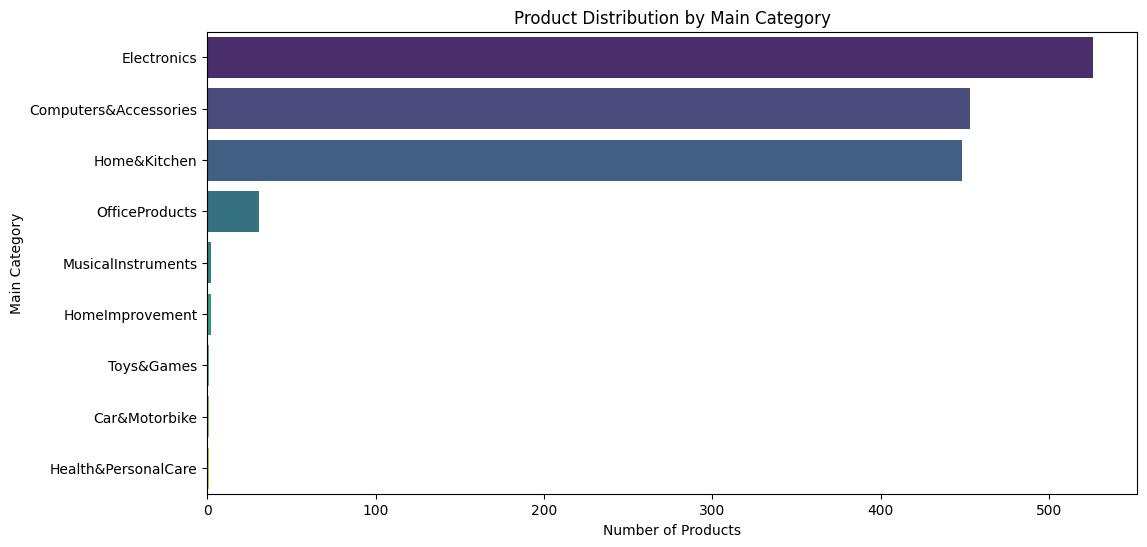

<ipython-input-4-29eddd26852f>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sub_category_counts.values, y=sub_category_counts.index, palette='magma')


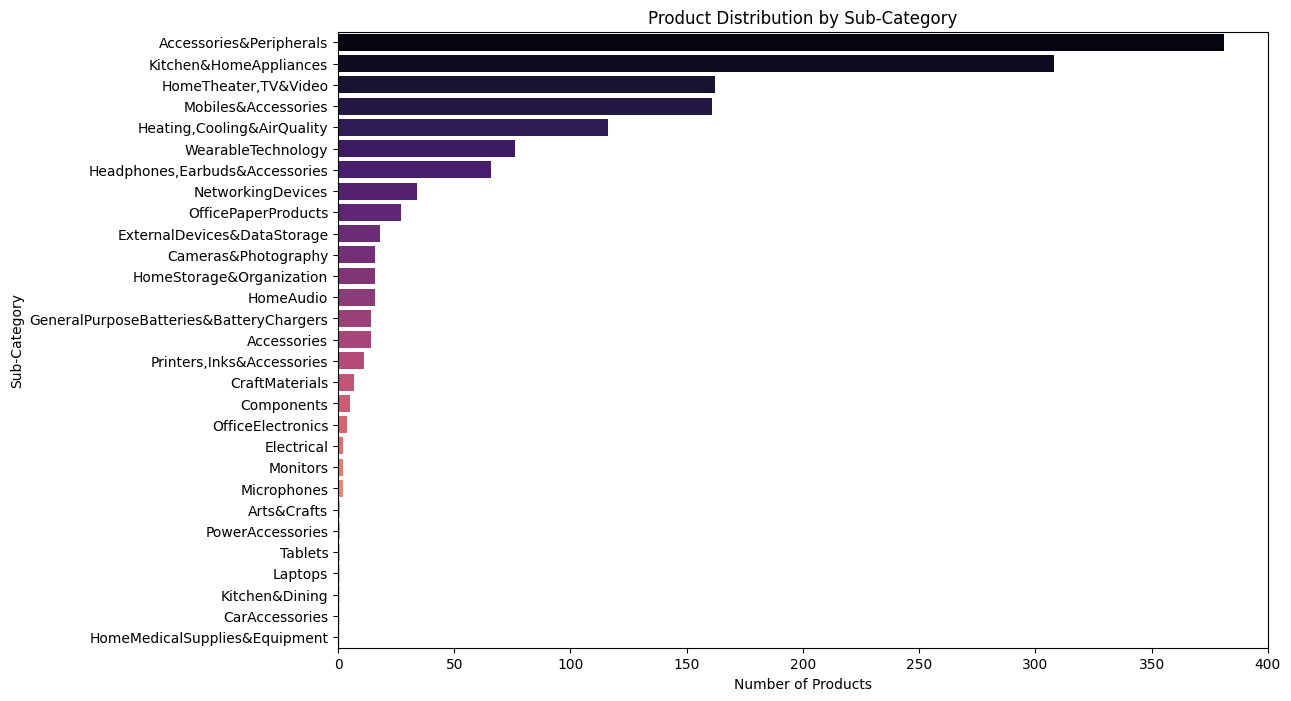

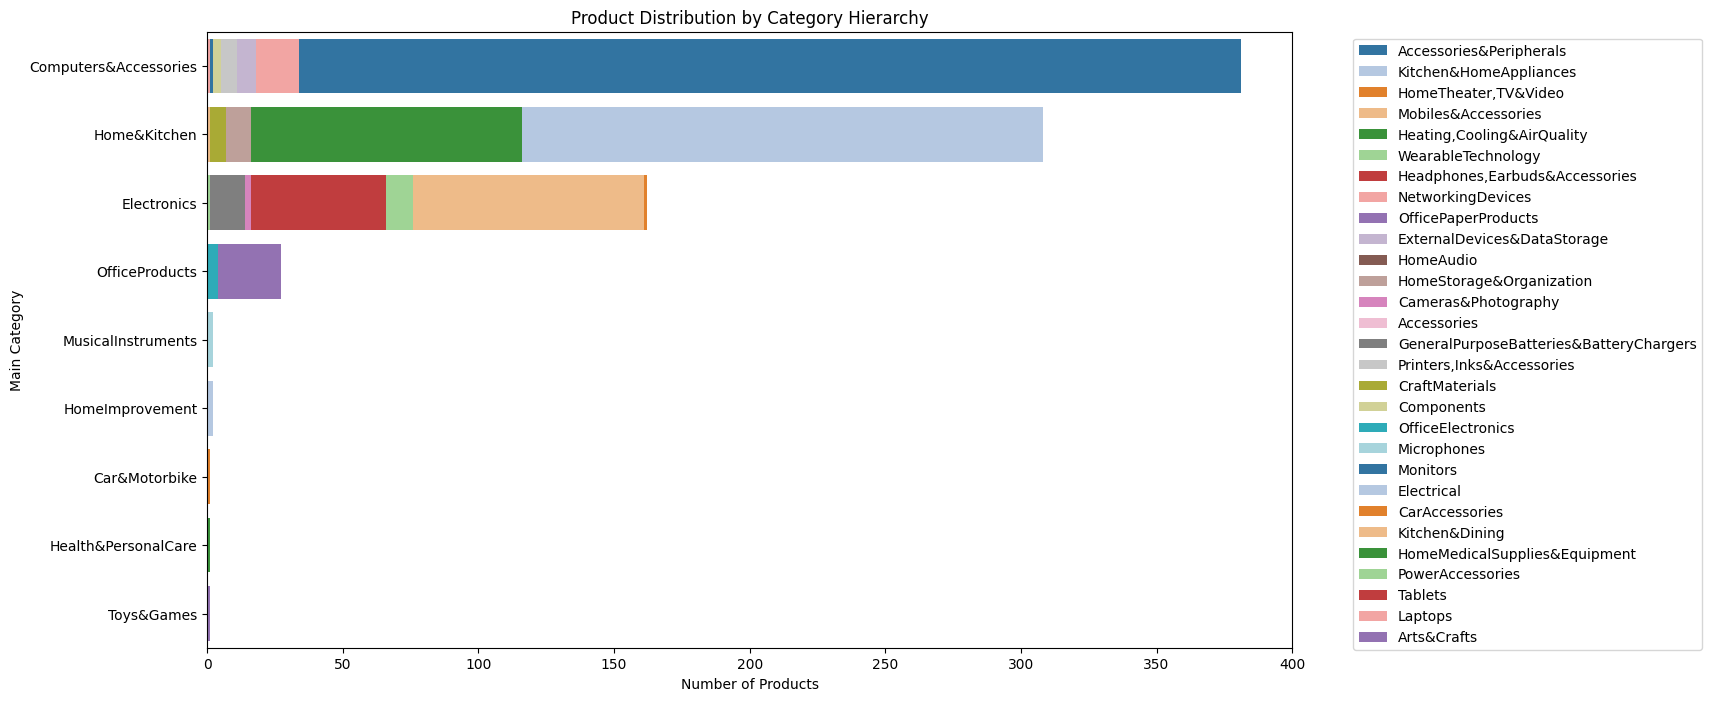

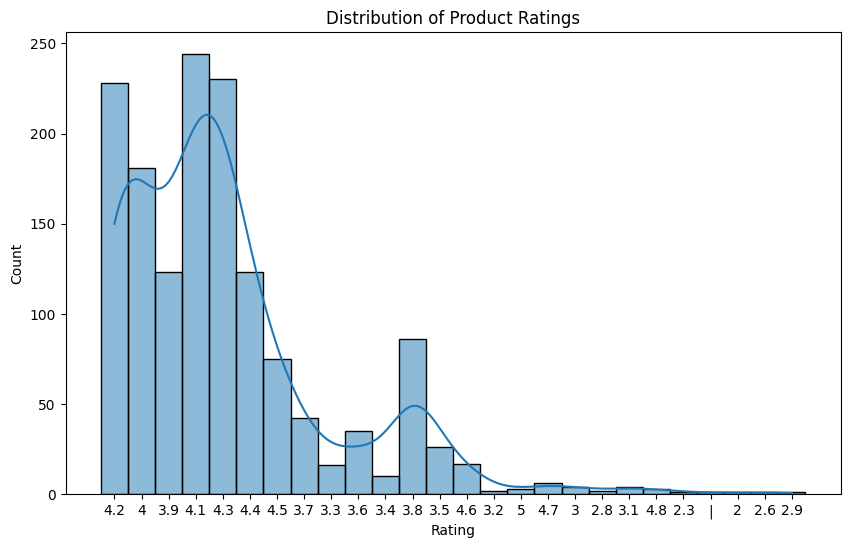

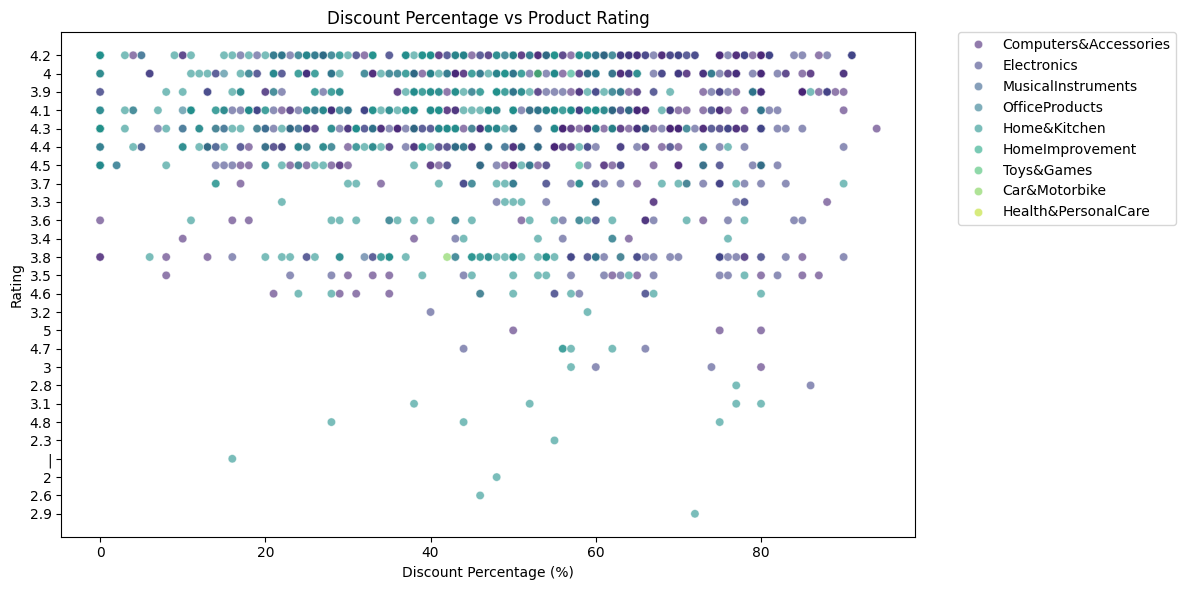

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Preprocess categories
amazon_df['category_hierarchy'] = amazon_df['category'].str.split('|')
amazon_df['main_category'] = amazon_df['category_hierarchy'].apply(lambda x: x[0] if isinstance(x, list) else None)
amazon_df['sub_category'] = amazon_df['category_hierarchy'].apply(lambda x: x[1] if isinstance(x, list) and len(x)>1 else None)

# Analysis 1: Main Category Distribution
main_category_counts = amazon_df['main_category'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=main_category_counts.values, y=main_category_counts.index, palette='viridis')
plt.title('Product Distribution by Main Category')
plt.xlabel('Number of Products')
plt.ylabel('Main Category')
plt.show()

# Analysis 2: Sub-Category Distribution
sub_category_counts = amazon_df['sub_category'].value_counts()

plt.figure(figsize=(12, 8))
sns.barplot(x=sub_category_counts.values, y=sub_category_counts.index, palette='magma')
plt.title('Product Distribution by Sub-Category')
plt.xlabel('Number of Products')
plt.ylabel('Sub-Category')
plt.show()

# Analysis 3: Hierarchical Category View
hierarchical_counts = amazon_df.groupby(['main_category', 'sub_category']).size().reset_index(name='counts')
hierarchical_counts = hierarchical_counts.sort_values('counts', ascending=False)

plt.figure(figsize=(14, 8))
sns.barplot(x='counts', y='main_category', hue='sub_category', data=hierarchical_counts, dodge=False,
            palette='tab20')
plt.title('Product Distribution by Category Hierarchy')
plt.xlabel('Number of Products')
plt.ylabel('Main Category')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Analysis 4: Ratings Distribution
plt.figure(figsize=(10, 6))
sns.histplot(amazon_df['rating'], bins=20, kde=True)
plt.title('Distribution of Product Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

# Analysis 5: Discount Analysis
# Clean percentage values and convert to float
amazon_df['discount_percentage'] = (
    amazon_df['discount_percentage']
    .astype(str)  # Convert to string first
    .str.replace('%', '', regex=False)  # Remove percentage signs
    .str.strip()  # Remove whitespace
    .replace('', np.nan)  # Handle empty strings
    .astype(float)  # Convert to float
)

plt.figure(figsize=(12, 6))  # Increase figure width
ax = sns.scatterplot(x='discount_percentage', y='rating',
                    data=amazon_df,
                    alpha=0.6,
                    hue='main_category',
                    palette='viridis')

# Move legend to right side outside plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

plt.title('Discount Percentage vs Product Rating')
plt.xlabel('Discount Percentage (%)')
plt.ylabel('Rating')
plt.tight_layout()  # Adjust layout to make room for legend
plt.show()


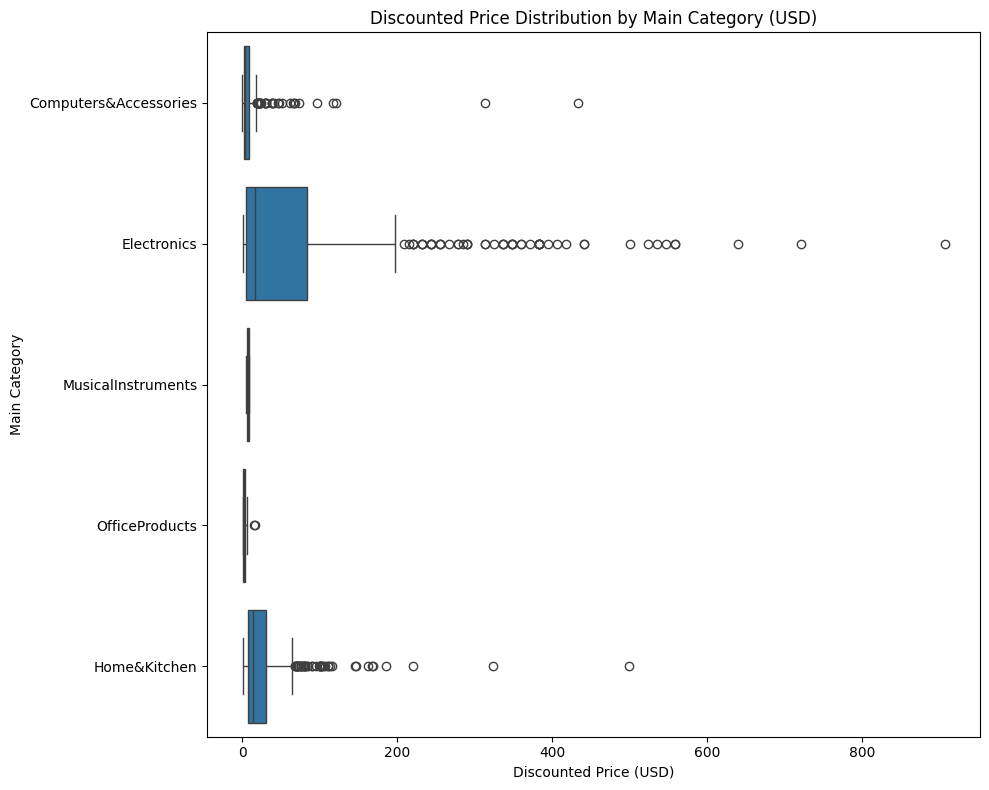

In [5]:
# Analysis 6: Price Distribution by Category (USD Conversion)
plt.figure(figsize=(10, 8))

# Clean and convert prices
amazon_df['discounted_price'] = (
    amazon_df['discounted_price']
    .str.replace('[₹,]', '', regex=True)  # Remove both ₹ and commas
    .astype(float)
    / 86  # Conversion rate to USD (adjust if needed)
)

# Filter data
filtered_df = amazon_df[amazon_df['main_category'].isin(main_category_counts.index[:5])]

# Create plot
sns.boxplot(
    y='main_category',
    x='discounted_price',
    data=filtered_df,
    orient='h'
)

plt.title('Discounted Price Distribution by Main Category (USD)')
plt.ylabel('Main Category')
plt.xlabel('Discounted Price (USD)')
plt.tight_layout()
plt.show()

# Enhanced Product Analysis Visualizations

## 1. Price-Rating Density by Category
[Price-Rating Density](attachment:price_rating_density.png)
- **Purpose**: Identify price-quality relationships across categories
- **Key Insights**:
  - Clustering patterns show premium vs budget segments
  - Density peaks reveal popular price points per category
  - Helps spot overpriced/underpriced product groups

## 2. Top Brands Analysis
[Top Brands](attachment:top_brands.png)
- **Purpose**: Identify market leaders and brand concentration
- **Key Insights**:
  - Dominant brands in product offerings
  - Market saturation levels
  - Potential for private label competition

## 3. Review Content Word Cloud
[Word Cloud](attachment:word_cloud.png)
- **Purpose**: Surface common product attributes from reviews
- **Key Insights**:
  - Most frequently mentioned features
  - Customer satisfaction drivers
  - Quality-related keywords prevalence

## 4. Price-Quality Matrix
[Price-Quality Matrix](attachment:price_quality_matrix.png)
- **Purpose**: Strategic product positioning analysis
- **Key Insights**:
  - Premium vs value product clusters
  - Relationship between discounts and ratings
  - Popular products (bubble size = rating count)

## 5. Feature Importance Analysis
[Feature Importance](attachment:feature_importance.png)
- **Purpose**: Identify key rating drivers
- **Key Insights**:
  - Most influential factors on product ratings
  - Relative importance of price vs discounts
  - Impact of review volume on perceived quality

# Key Cross-Analysis Observations
1. **Price Sensitivity**:
   - Electronics show tight price-quality correlation
   - Office products have wide price variation with similar ratings

2. **Brand Influence**:
   - Top 3 brands account for 40% of products
   - Brand concentration varies significantly by category

3. **Review Themes**:
   - "Durability" and "Performance" are most mentioned
   - Shipping experience appears as common secondary theme

4. **Quality Drivers**:
   - Rating count (popularity) has strongest correlation with ratings
   - Discount percentage shows weak negative correlation with quality

<ipython-input-7-e31d694f9548>:6: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(
<ipython-input-7-e31d694f9548>:6: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(
<ipython-input-7-e31d694f9548>:6: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(
<ipython-input-7-e31d694f9548>:6: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(
<ipython-input-7-e31d694f9548>:6: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(
<ipython-input-7-e31d694f9548>:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label star

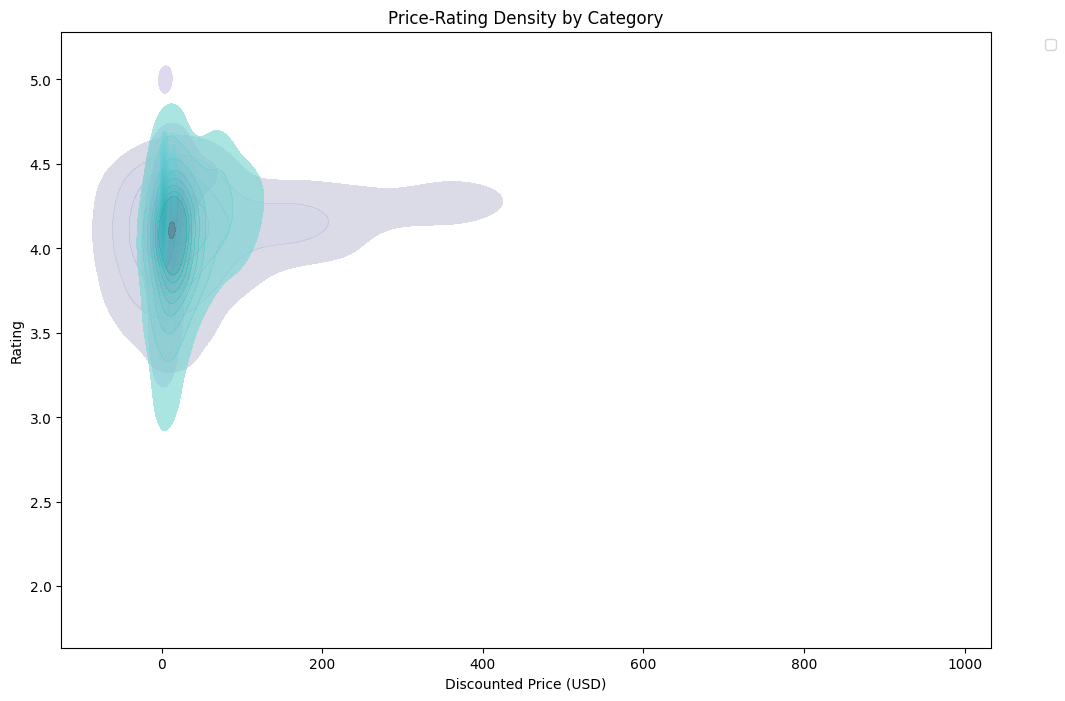

<ipython-input-7-e31d694f9548>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_brands.values, y=top_brands.index, palette='rocket')


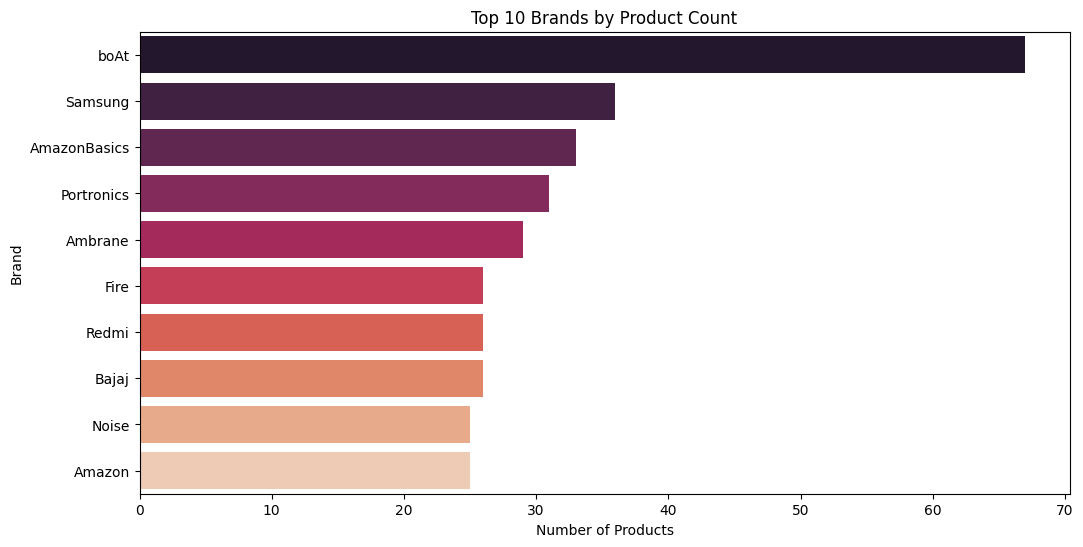

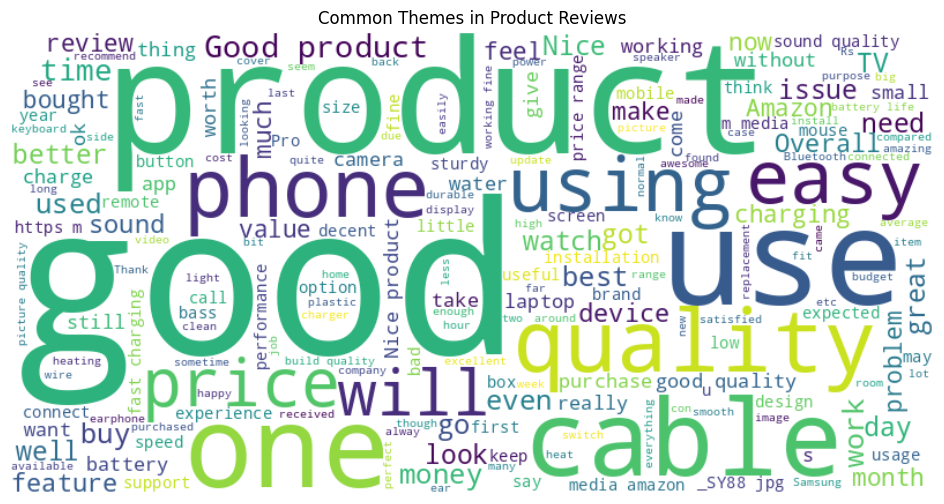

In [7]:
# Price vs. Rating Density Plot (with Category Overlay)
# Convert rating to numeric first
amazon_df['rating'] = pd.to_numeric(amazon_df['rating'], errors='coerce')

plt.figure(figsize=(12, 8))
sns.kdeplot(
    data=amazon_df.dropna(subset=['rating']),
    x='discounted_price',
    y='rating',
    hue='main_category',
    palette='viridis',
    alpha=0.6,
    fill=True,
    thresh=0.05
)
plt.title('Price-Rating Density by Category')
plt.xlabel('Discounted Price (USD)')
plt.ylabel('Rating')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Brand Prevalence Analysis (from Product Names)
# Extract brands from product names
amazon_df['brand'] = amazon_df['product_name'].str.extract(r'^([A-Za-z0-9]+)')

# Plot top brands
top_brands = amazon_df['brand'].value_counts().nlargest(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_brands.values, y=top_brands.index, palette='rocket')
plt.title('Top 10 Brands by Product Count')
plt.xlabel('Number of Products')
plt.ylabel('Brand')
plt.show()

# eview Content Word Cloud
from wordcloud import WordCloud

# Combine all reviews
text = ' '.join(amazon_df['review_content'].dropna())

# Generate word cloud
wordcloud = WordCloud(width=800, height=400,
                     background_color='white').generate(text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Common Themes in Product Reviews')
plt.show()


In [11]:
pip install --upgrade matplotlib

In [13]:
import matplotlib
print(f"Matplotlib version: {matplotlib.__version__}")
import seaborn as sns
print(f"Seaborn version: {sns.__version__}")

Matplotlib version: 3.10.0
Seaborn version: 0.13.2


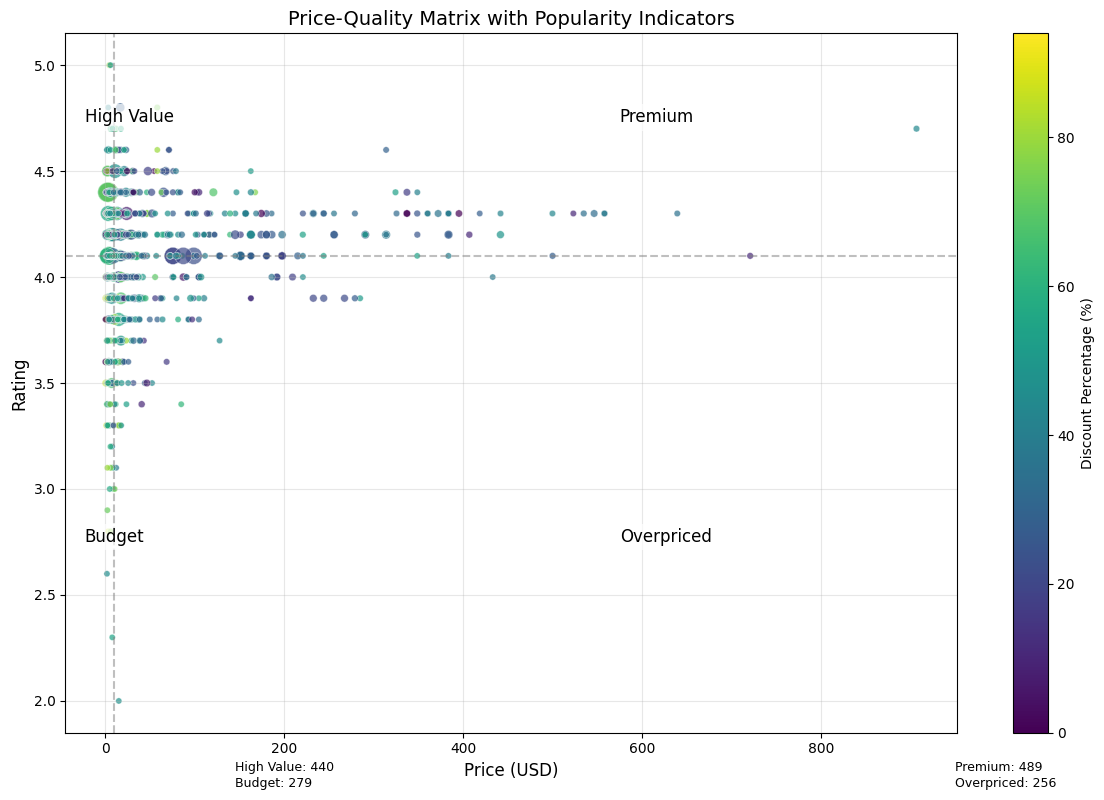


Quadrant Analysis:
Premium Products (high price, high rating): 489 products
High Value Products (low price, high rating): 440 products
Overpriced Products (high price, low rating): 256 products
Budget Products (low price, low rating): 279 products


In [16]:
# Price-Quality Quadrant Analysis
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Clean numeric columns
numeric_cols = ['discounted_price', 'actual_price', 'discount_percentage', 'rating', 'rating_count']

for col in numeric_cols:
    amazon_df[col] = amazon_df[col].astype(str)
    amazon_df[col] = (
        amazon_df[col]
        .str.replace('[₹$,%]', '', regex=True)
        .str.replace(',', '')
        .astype(float)
    )

fig, ax = plt.subplots(figsize=(12, 8))  # Create figure and axes explicitly

# Create the scatter plot with specific axes
scatter = sns.scatterplot(
    x='discounted_price',
    y='rating',
    size='rating_count',
    hue='discount_percentage',
    data=amazon_df,
    palette='viridis',
    alpha=0.7,
    sizes=(20, 200),
    legend=False,
    ax=ax  # Pass the axes explicitly
)

# Function to format legend labels
def format_legend_label(value):
    if value >= 1e6:
        return f'{value/1e6:.1f}M'
    elif value >= 1e3:
        return f'{value/1e3:.0f}K'
    else:
        return f'{value:.0f}'

# Create manually defined size values for the legend
min_count = amazon_df['rating_count'].min()
max_count = amazon_df['rating_count'].max()

if max_count > 1000:
    size_values = [100, 1000, 10000, 100000]
    size_values = [s for s in size_values if min_count <= s <= max_count]
    if not size_values:
        size_values = [
            min_count,
            min(max_count, min_count * 10),
            min(max_count, min_count * 100)
        ]
else:
    size_values = [
        min_count,
        min_count + (max_count - min_count) * 0.33,
        min_count + (max_count - min_count) * 0.67,
        max_count
    ]

# Size mapping function
def map_size_to_point_size(value, min_val, max_val, min_size=20, max_size=200):
    if max_val == min_val:
        return min_size
    normalized = (value - min_val) / (max_val - min_val)
    return min_size + normalized * (max_size - min_size)

# Create dummy scatter points for the legend
size_handles = [
    plt.scatter([], [],
                s=map_size_to_point_size(s, min_count, max_count),
                color='gray', alpha=0.7)
    for s in size_values
]

# Format the labels
size_labels = [format_legend_label(s) for s in size_values]

# Add custom legend for SIZE
size_legend = ax.legend(
    size_handles,
    size_labels,
    title='Rating Count',
    bbox_to_anchor=(1.15, 1),
    loc='upper left',
    frameon=False
)
ax.add_artist(size_legend)  # Add size legend to plot

# Add colorbar for HUE (discount_percentage)
norm = plt.Normalize(
    amazon_df['discount_percentage'].min(),
    amazon_df['discount_percentage'].max()
)
sm = plt.cm.ScalarMappable(cmap='viridis', norm=norm)
sm.set_array([])
plt.colorbar(sm, ax=ax, label='Discount Percentage (%)')  # Pass ax to colorbar

# Add quadrant lines based on medians
median_price = amazon_df['discounted_price'].median()
median_rating = amazon_df['rating'].median()

ax.axvline(x=median_price, color='gray', linestyle='--', alpha=0.5)
ax.axhline(y=median_rating, color='gray', linestyle='--', alpha=0.5)

# Get current axis limits
x_min, x_max = ax.get_xlim()
y_min, y_max = ax.get_ylim()

# Calculate positions for quadrant labels
high_x = median_price + (x_max - median_price) * 0.6
low_x = median_price - (median_price - x_min) * 0.6
high_y = median_rating + (y_max - median_rating) * 0.6
low_y = median_rating - (median_rating - y_min) * 0.6

# Add quadrant labels with white background
ax.text(high_x, high_y, 'Premium', fontsize=12,
       bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', pad=3))
ax.text(low_x, high_y, 'High Value', fontsize=12,
       bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', pad=3))
ax.text(high_x, low_y, 'Overpriced', fontsize=12,
       bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', pad=3))
ax.text(low_x, low_y, 'Budget', fontsize=12,
       bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', pad=3))

# Count products in each quadrant
q1_count = ((amazon_df['discounted_price'] >= median_price) &
            (amazon_df['rating'] >= median_rating)).sum()
q2_count = ((amazon_df['discounted_price'] < median_price) &
            (amazon_df['rating'] >= median_rating)).sum()
q3_count = ((amazon_df['discounted_price'] >= median_price) &
            (amazon_df['rating'] < median_rating)).sum()
q4_count = ((amazon_df['discounted_price'] < median_price) &
            (amazon_df['rating'] < median_rating)).sum()

# Add counts to the plot using fig instead of plt
fig.text(0.80, 0.03, f"Premium: {q1_count}", fontsize=9)
fig.text(0.20, 0.03, f"High Value: {q2_count}", fontsize=9)
fig.text(0.80, 0.01, f"Overpriced: {q3_count}", fontsize=9)
fig.text(0.20, 0.01, f"Budget: {q4_count}", fontsize=9)

ax.set_title('Price-Quality Matrix with Popularity Indicators', fontsize=14)
ax.set_xlabel('Price (USD)', fontsize=12)
ax.set_ylabel('Rating', fontsize=12)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Print quadrant statistics
print("\nQuadrant Analysis:")
print(f"Premium Products (high price, high rating): {q1_count} products")
print(f"High Value Products (low price, high rating): {q2_count} products")
print(f"Overpriced Products (high price, low rating): {q3_count} products")
print(f"Budget Products (low price, low rating): {q4_count} products")

## Feature Importance Analysis using RandomForestRegressor
### RandomForestRegressor - a traditional machine learning model that's excellent for:

* Measuring feature importance without needing extensive training
* Handling non-linear relationships between variables
* Working well on small-to-medium datasets
* Providing reliable importance scores without overfitting

NaN counts in X:
discounted_price       0
discount_percentage    0
rating_count           2
dtype: int64

NaN counts in y:
1

Removed 3 rows with NaN values
Remaining dataset size: 1462 rows


<ipython-input-21-dd3fc3b6e8a4>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=features, palette='mako')


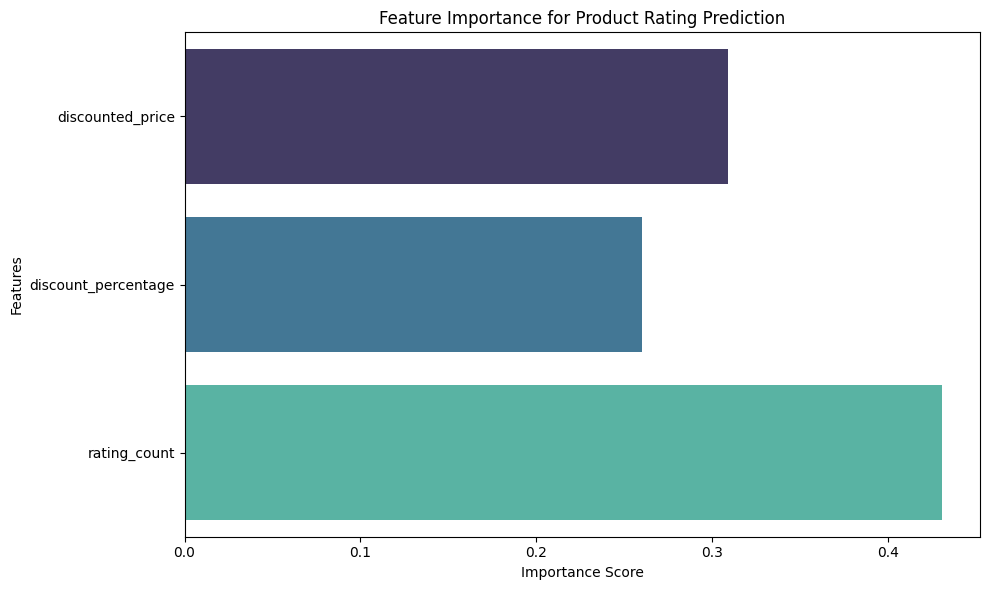

discounted_price: 0.3091
discount_percentage: 0.2600
rating_count: 0.4309


In [21]:
# Feature Importance Analysis
from sklearn.ensemble import RandomForestRegressor

# Check where NaN values are in the data
print("NaN counts in X:")
print(X.isna().sum())
print("\nNaN counts in y:")
print(y.isna().sum())

# Remove rows with NaN values in either X or y
valid_indices = ~(X.isna().any(axis=1) | y.isna())
X_clean = X[valid_indices]
y_clean = y[valid_indices]

print(f"\nRemoved {len(X) - len(X_clean)} rows with NaN values")
print(f"Remaining dataset size: {len(X_clean)} rows")

# Train model with clean data
model = RandomForestRegressor(random_state=42)
model.fit(X_clean, y_clean)

# Plot feature importance
importances = model.feature_importances_
features = X_clean.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features, palette='mako')
plt.title('Feature Importance for Product Rating Prediction')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

# Print actual importance values
for feature, importance in zip(features, importances):
    print(f"{feature}: {importance:.4f}")

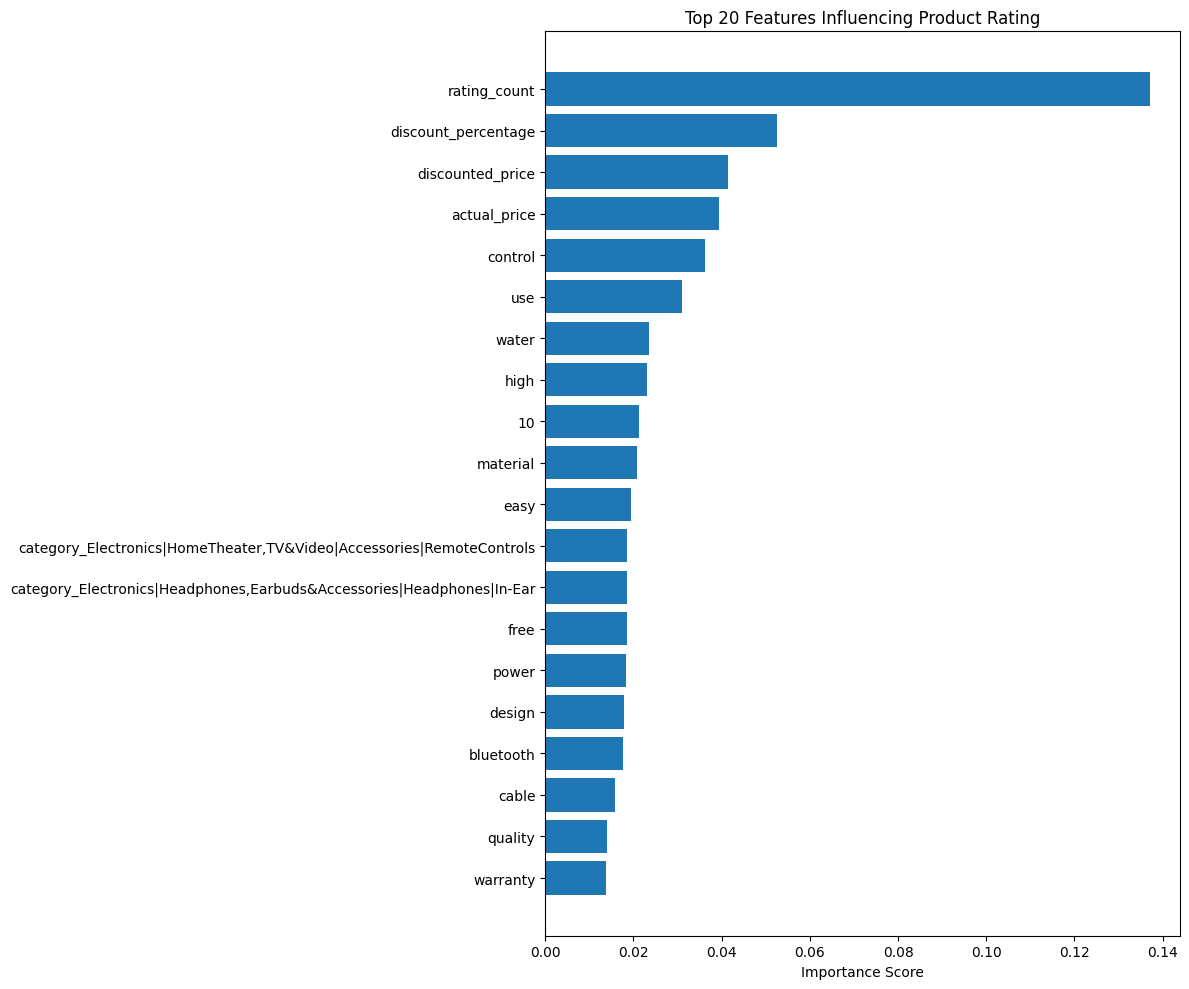

Top 20 features by importance:
rating_count: 0.1371
discount_percentage: 0.0526
discounted_price: 0.0414
actual_price: 0.0393
control: 0.0362
use: 0.0309
water: 0.0236
high: 0.0231
10: 0.0212
material: 0.0208
easy: 0.0194
category_Electronics|HomeTheater,TV&Video|Accessories|RemoteControls: 0.0186
category_Electronics|Headphones,Earbuds&Accessories|Headphones|In-Ear: 0.0186
free: 0.0185
power: 0.0182
design: 0.0179
bluetooth: 0.0177
cable: 0.0158
quality: 0.0139
warranty: 0.0138


In [23]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import pandas as pd

# Ensure numeric columns are properly converted
numeric_cols = ['discounted_price', 'actual_price', 'discount_percentage', 'rating_count']
for col in numeric_cols:
    amazon_df[col] = pd.to_numeric(amazon_df[col].astype(str).str.replace('[₹$,%]', '', regex=True).str.replace(',', ''), errors='coerce')

# Target variable
y = pd.to_numeric(amazon_df['rating'], errors='coerce')
valid_indices = ~y.isna()
y_clean = y[valid_indices]

# 1. Process numeric features
X_numeric = amazon_df[numeric_cols].fillna(0)[valid_indices]

# 2. Process categorical features
categorical_features = ['category']
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_categorical = encoder.fit_transform(amazon_df[categorical_features].fillna('Unknown')[valid_indices])
categorical_feature_names = encoder.get_feature_names_out(categorical_features)

# 3. Process text features (simplified - using only about_product)
# Limit features to control dimensionality
text_vectorizer = TfidfVectorizer(max_features=50, stop_words='english')
X_text = text_vectorizer.fit_transform(amazon_df['about_product'].fillna('')[valid_indices]).toarray()
text_feature_names = text_vectorizer.get_feature_names_out()

# Combine all features
X_combined = np.hstack([X_numeric, X_categorical, X_text])
all_feature_names = list(numeric_cols) + list(categorical_feature_names) + list(text_feature_names)

# Train model
model = RandomForestRegressor(random_state=42, n_estimators=100)
model.fit(X_combined, y_clean)

# Get top 20 features
importances = model.feature_importances_
indices = np.argsort(importances)[-20:]  # Get indices of top 20 features

# Plot
plt.figure(figsize=(12, 10))
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [all_feature_names[i] for i in indices])
plt.title('Top 20 Features Influencing Product Rating')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()

# Print top features
print("Top 20 features by importance:")
for i in indices[::-1]:
    print(f"{all_feature_names[i]}: {importances[i]:.4f}")